In [1]:
%matplotlib inline

In [5]:
df = pd.read_csv('../Resources/State Employment Rates.csv')
df

,State,Employment Percentage
0,Alabama,54.9
1,Alaska,60.9
2,Arizona,58.4
3,Arkansas,55.7
4,California,59.8
5,Colorado,66.9
6,Connecticut,63.4
7,Delaware,60.2
8,District of Columbia,66.5
9,Florida,57.3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
automation_data_df = pd.read_csv('../Resources/automation_data_by_state.csv', encoding='cp1252')

#clean the dataframe by removing all rows where there are no data in any of the state (0 for every state)
automation_data_df = automation_data_df.drop(automation_data_df[automation_data_df.iloc[:,3:].sum(axis=1) == 0].index)

automation_data_df_sorted = automation_data_df.sort_values(by=['Probability'], ascending=False)

automation_data_df_sorted

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
54,13-2053,Insurance Underwriters,0.9900,960,120,1470,200,7440,1390,3160,...,270,880,5660,460,190,2280,1970,170,2290,90
190,25-4031,Library Technicians,0.9900,830,260,1430,400,10190,2460,1650,...,650,1340,3740,560,550,2290,2870,320,2520,440
75,15-2091,Mathematical Technicians,0.9900,0,0,0,0,0,0,0,...,0,0,110,0,0,0,0,0,0,0
403,43-4141,New Accounts Clerks,0.9900,430,50,900,450,3850,480,90,...,40,950,4280,350,0,980,630,320,1160,170
601,51-6051,Sewers; Hand,0.9900,110,0,0,0,1820,0,0,...,0,0,880,0,0,50,30,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,29-1181,Audiologists,0.0033,70,0,290,60,880,290,90,...,0,320,970,150,0,360,420,110,160,0
159,21-1023,Mental Health and Substance Abuse Social Workers,0.0031,1150,460,2510,830,12850,1770,2030,...,290,1630,3310,1130,980,4210,2300,190,1520,130
501,49-1011,First-Line Supervisors of Mechanics; Installer...,0.0030,8150,1140,10410,4890,39910,7340,4180,...,930,10630,38300,4330,1170,13860,10490,3220,8380,1740
29,11-9161,Emergency Management Directors,0.0030,180,70,140,130,900,130,130,...,90,140,480,130,0,440,150,70,170,40


## displays a histogram of the probability for the data

The histogram below shows that most of the jobs in the dataset have a 0-0.05% chance of being automated 

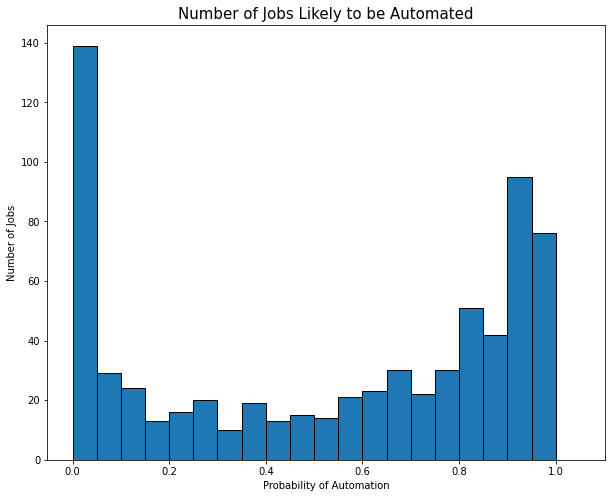

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
246,29-1125,Recreational Therapists,0.0028,120,0,480,60,1710,110,470,...,50,350,790,360,40,370,240,50,290,50
501,49-1011,First-Line Supervisors of Mechanics; Installer...,0.0030,8150,1140,10410,4890,39910,7340,4180,...,930,10630,38300,4330,1170,13860,10490,3220,8380,1740
29,11-9161,Emergency Management Directors,0.0030,180,70,140,130,900,130,130,...,90,140,480,130,0,440,150,70,170,40
159,21-1023,Mental Health and Substance Abuse Social Workers,0.0031,1150,460,2510,830,12850,1770,2030,...,290,1630,3310,1130,980,4210,2300,190,1520,130
250,29-1181,Audiologists,0.0033,70,0,290,60,880,290,90,...,0,320,970,150,0,360,420,110,160,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,43-4141,New Accounts Clerks,0.9900,430,50,900,450,3850,480,90,...,40,950,4280,350,0,980,630,320,1160,170
54,13-2053,Insurance Underwriters,0.9900,960,120,1470,200,7440,1390,3160,...,270,880,5660,460,190,2280,1970,170,2290,90
408,43-5011,Cargo and Freight Agents,0.9900,740,660,940,810,12760,620,450,...,370,1040,11820,570,60,2700,1930,70,1060,50
644,51-9151,Photographic Process Workers and Processing Ma...,0.9900,260,120,330,0,3520,260,260,...,80,1930,1150,320,0,1330,390,80,570,40


In [4]:
#plots the distribution of the data based on probability (0-0.05, 0.05-0.10, .. etc)
bins = np.arange(0,1.1,0.05)
prob_data = automation_data_df_sorted['Probability'].values
plt.figure(figsize=(10, 8))
plt.hist(prob_data,bins,edgecolor='black')
plt.title('Number of Jobs Likely to be Automated', fontsize = 15)
plt.ylabel('Number of Jobs', fontsize=10)
plt.xlabel('Probability of Automation', fontsize=10)
plt.show()

#sorted dataframe by least likely to be automated jobs
automation_data_df_least_likely = automation_data_df.sort_values(by=['Probability'])
automation_data_df_least_likely

In [5]:
#gets the sum of the number of jobs that will be automated per state
jobs_df = automation_data_df_sorted.iloc[:,3:]
jobs_loss_per_state = jobs_df.sum()

print(jobs_loss_per_state)


#set up variables for chart of job losses per state
sorted_jobs_loss_per_state = jobs_loss_per_state.sort_values()

jobs_loss_per_state_values = sorted_jobs_loss_per_state.values
jobs_loss_per_state_indx = np.arange(len(jobs_loss_per_state_values))
jobs_loss_per_state_labels = sorted_jobs_loss_per_state.index


Alabama                  1722020
Alaska                    284920
Arizona                  2355040
Arkansas                 1070380
California              14163090
Colorado                 2212180
Connecticut              1475400
Delaware                  371070
District of Columbia      599560
Florida                  7349340
Georgia                  3797560
Hawaii                    558070
Idaho                     589520
Illinois                 5168630
Indiana                  2684160
Iowa                     1363960
Kansas                   1216310
Kentucky                 1650310
Louisiana                1722150
Maine                     527810
Maryland                 2306300
Massachusetts            3069190
Michigan                 3757710
Minnesota                2501100
Mississippi              1003550
Missouri                 2443440
Montana                   401890
Nebraska                  863660
Nevada                   1140240
New Hampshire             573810
New Jersey

## Number of jobs lost due to automation per state

<br>

<h3><b>The graph below shows the total number of jobs loss per state due to automation.</b></h3>
<br>
<br>
Below we see California in first with around 14 million total job losses due to automation. This shows that <br>


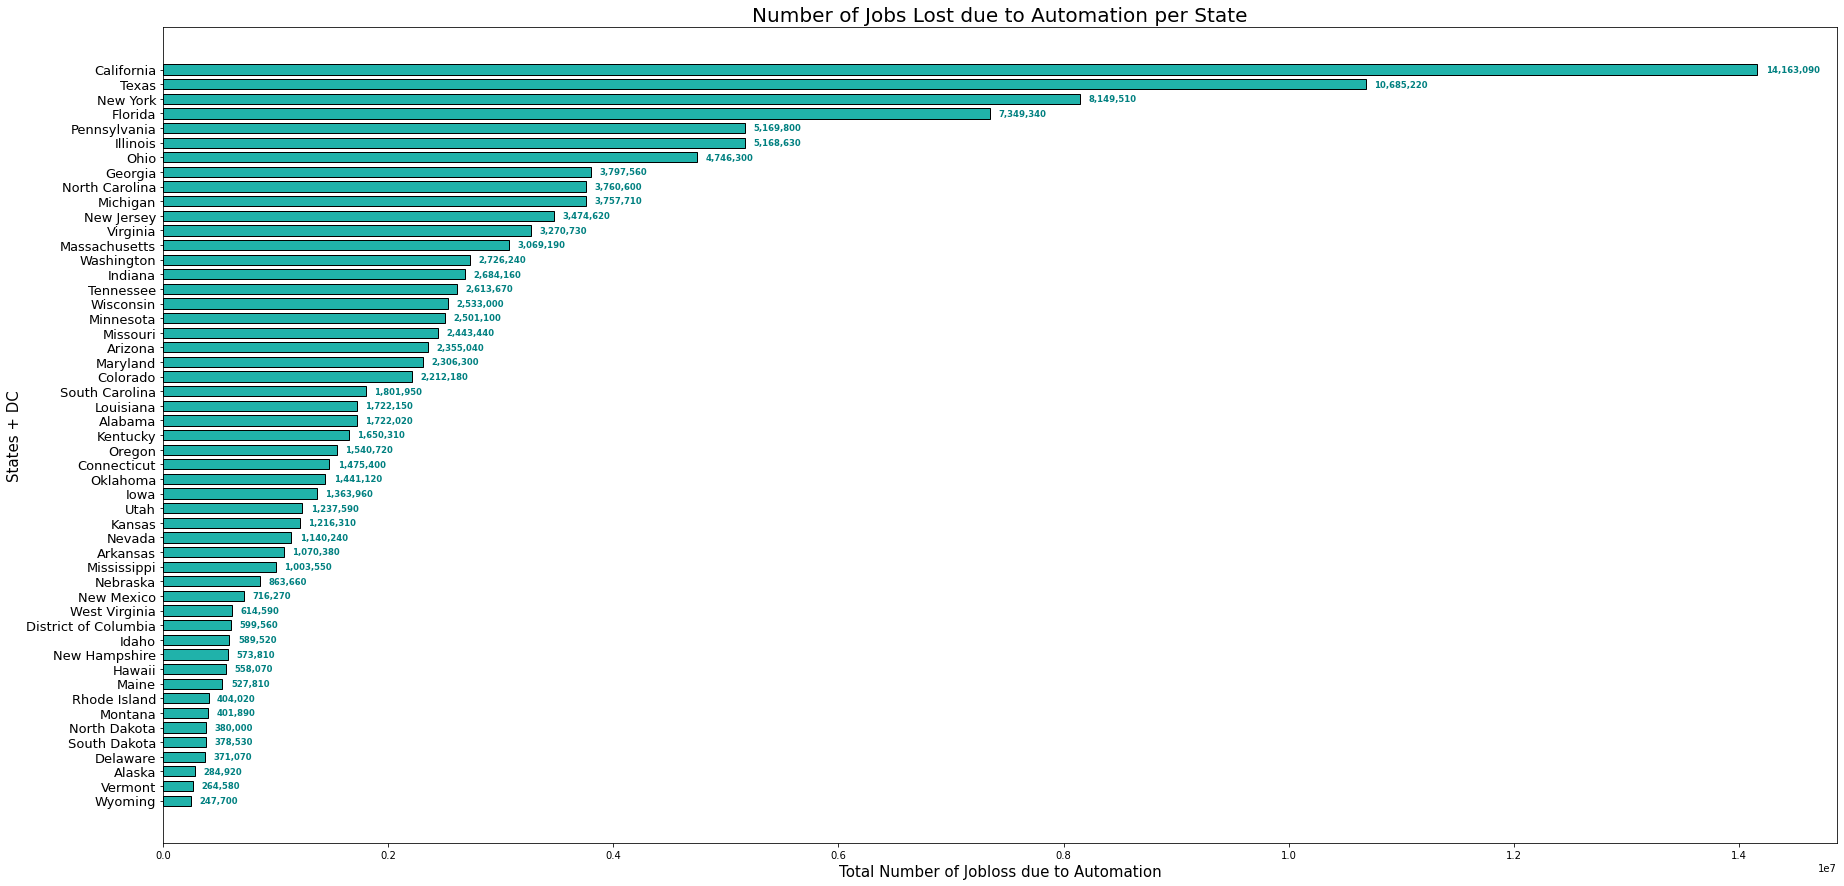

In [6]:
#Plot of the number of jobs lost due to automation per state

#annotate the max value
plt.figure(figsize=(30, 15))
plt.title('Number of Jobs Lost due to Automation per State', fontsize = 20)
plt.barh(jobs_loss_per_state_indx, jobs_loss_per_state_values, color='lightseagreen', edgecolor = 'black',height = 0.7, align='center')
plt.yticks(jobs_loss_per_state_indx, jobs_loss_per_state_labels, fontsize=13)
plt.ylabel('States + DC', fontsize=15)
plt.xlabel('Total Number of Jobloss due to Automation', fontsize=15)
for i,j in zip(jobs_loss_per_state_indx, jobs_loss_per_state_values):
    num = format(j,',')
    plt.text(j+75000, i, f'{num}',va='center', weight='bold', color='teal', fontsize = 8.5)
plt.title('Number of Jobs Lost due to Automation per State', fontsize = 20)
plt.show()

## Displays top 3 states and breakdown of the top 15 jobs 
<br>
<br>
From the graph below we can see that within the top 3 states that will be effected by automation the most, the most notable from the top 15 jobs likely to be automated (98-99%) is Bookkeeping;Accounting;Auditing Clerks and California specifically holds over 175,000 of those jobs. 

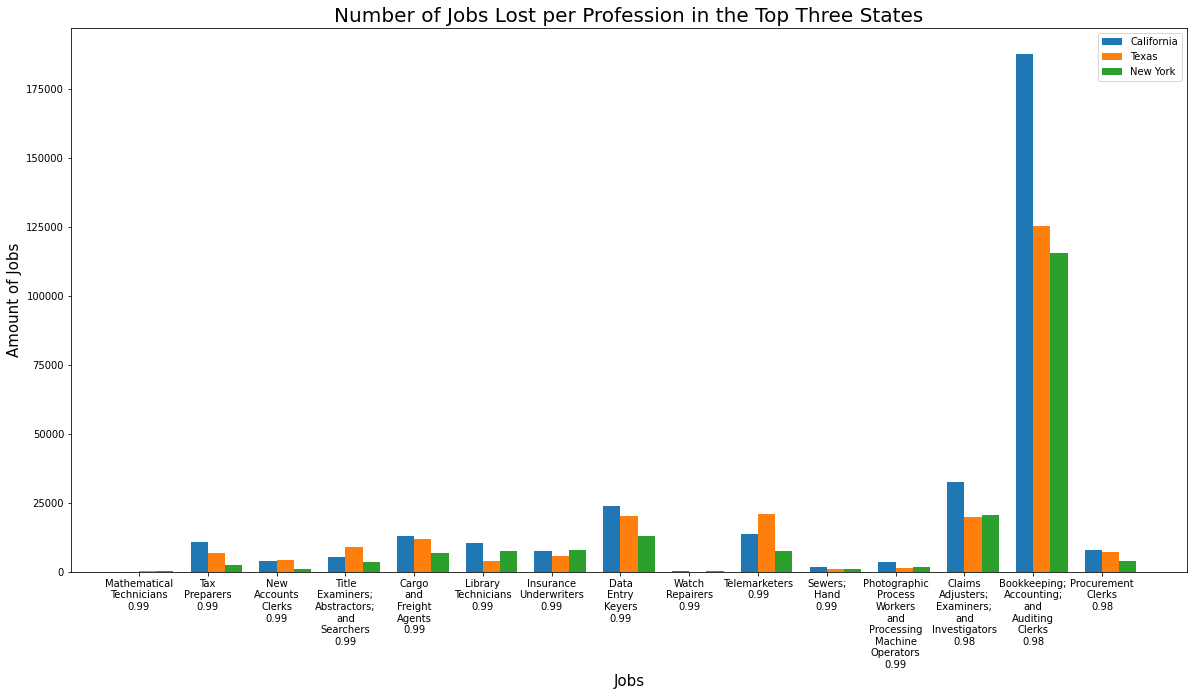

In [7]:
#top x jobs with highest automation chance
idx_range = 15

#Dataframe of california, texas, and new york sorted by jobs most likely to be automated
california_df = automation_data_df_sorted['California'].values[:idx_range]
texas_df = automation_data_df_sorted['Texas'].values[:idx_range]
new_york_df = automation_data_df_sorted['New York'].values[:idx_range]

#replace the space character with new line in order to wrap the words to display the text cleanly
x_labels = [i.replace(' ', '\n') for i in automation_data_df_sorted['Occupation'].values[:idx_range]]
percentages = [('\n' + str(i)) for i in automation_data_df_sorted['Probability'].values[:idx_range]]

x_labels = [i + j for i,j in zip(x_labels, percentages)]


x = np.arange(len(x_labels))

#plot variables
width = 0.25
plt.figure(figsize=(20, 10))
plt.bar(x, california_df, width = 0.25, label = 'California')
plt.bar(x + width, texas_df, width = 0.25, label = 'Texas')
plt.bar(x + (2 * width), new_york_df, width = 0.25, label = 'New York')

plt.xticks(x + width/2, x_labels)
plt.legend()
plt.ylabel('Amount of Jobs', fontsize=15)
plt.xlabel('Jobs', fontsize=15)
plt.title('Number of Jobs Lost per Profession in the Top Three States', fontsize = 20)
plt.show()


## Top 15 least likely to be automated jobs

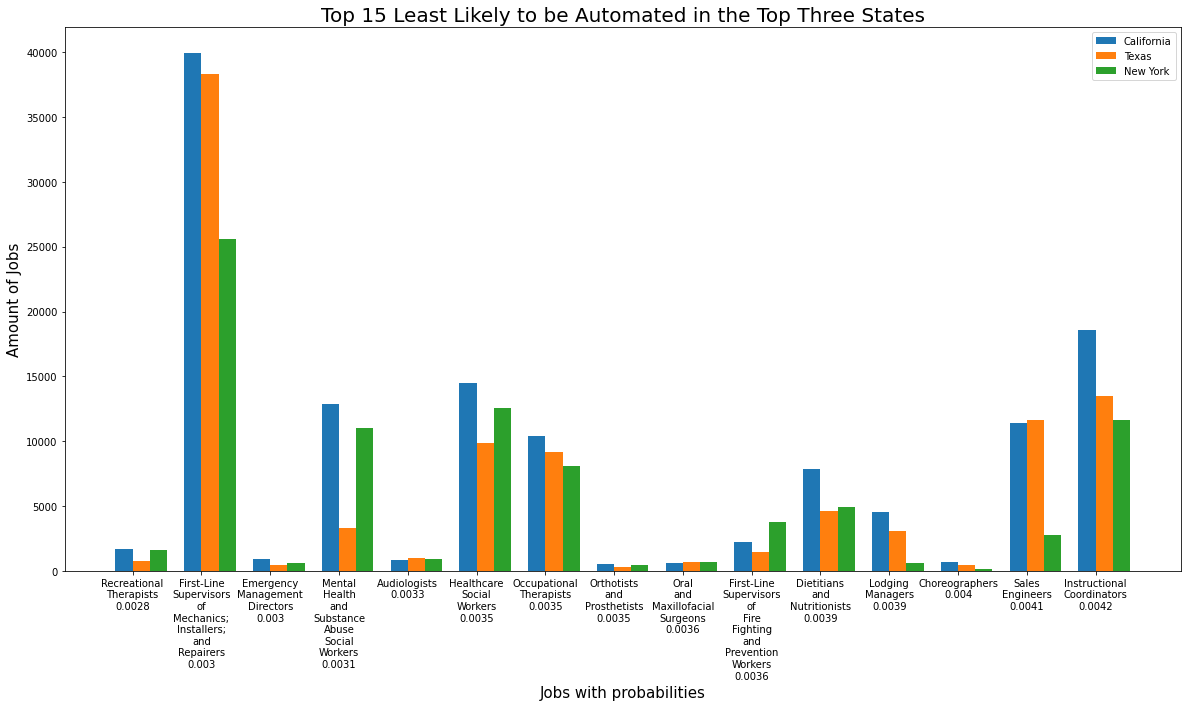

In [8]:
#top x jobs with highest automation chance
idx_range = 15

#Number of jobs with 99% chance of automation in California
california_df = automation_data_df_least_likely['California'].values[:idx_range]
texas_df = automation_data_df_least_likely['Texas'].values[:idx_range]
new_york_df = automation_data_df_least_likely['New York'].values[:idx_range]

#replace the space character with new line in order to wrap the words to display the text cleanly
x_labels = [i.replace(' ', '\n') for i in automation_data_df_least_likely['Occupation'].values[:idx_range]]
percentages = [('\n' + str(i)) for i in automation_data_df_least_likely['Probability'].values[:idx_range]]

x_labels = [i + j for i,j in zip(x_labels, percentages)]

x = np.arange(len(x_labels))

#plot variables

plt.figure(figsize=(20, 10))
plt.bar(x, california_df, width = 0.25, label = 'California')
plt.bar(x + width, texas_df, width = 0.25, label = 'Texas')
plt.bar(x + (2 * width), new_york_df, width = 0.25, label = 'New York')

plt.xticks(x + width/2, x_labels)
plt.legend()
plt.ylabel('Amount of Jobs', fontsize=15)
plt.xlabel('Jobs with probabilities', fontsize=15)
plt.title('Top 15 Least Likely to be Automated in the Top Three States', fontsize = 20)
plt.show()

In [9]:
#sum of how many people have the occupation
occupation_sum_df = pd.concat([automation_data_df.iloc[:,:3], automation_data_df.iloc[:,2:].sum(axis=1)], axis=1)
occupation_sum_df = occupation_sum_df.rename(columns={0:'Num of Workers'})
occupation_sum_df = occupation_sum_df.sort_values(by='Num of Workers', ascending=False)

occupation_sum_df.head(25)

,SOC,Occupation,Probability,Num of Workers
368,41-2031,Retail Salespersons,0.9200,4.528571e+06
364,41-2011,Cashiers,0.9700,3.540981e+06
317,35-3021,Combined Food Preparation and Serving Workers;...,0.9200,3.426091e+06
430,43-9061,Office Clerks; General,0.9600,2.955561e+06
396,43-4051,Customer Service Representatives,0.5500,2.707031e+06
693,53-7062,Laborers and Freight; Stock; and Material Move...,0.8500,2.587941e+06
319,35-3031,Waiters and Waitresses,0.9400,2.564621e+06
423,43-6014,Secretaries and Administrative Assistants; Exc...,0.9600,2.295481e+06
1,11-1021,General and Operations Managers,0.1600,2.188870e+06
326,37-2011,Janitors and Cleaners; Except Maids and Housek...,0.6600,2.161711e+06


## Scatter plot of the amount of people affected due to job automation

The shade of red + size of dot represent how many people have the occupation (the closer to red the more people with the occupation). 

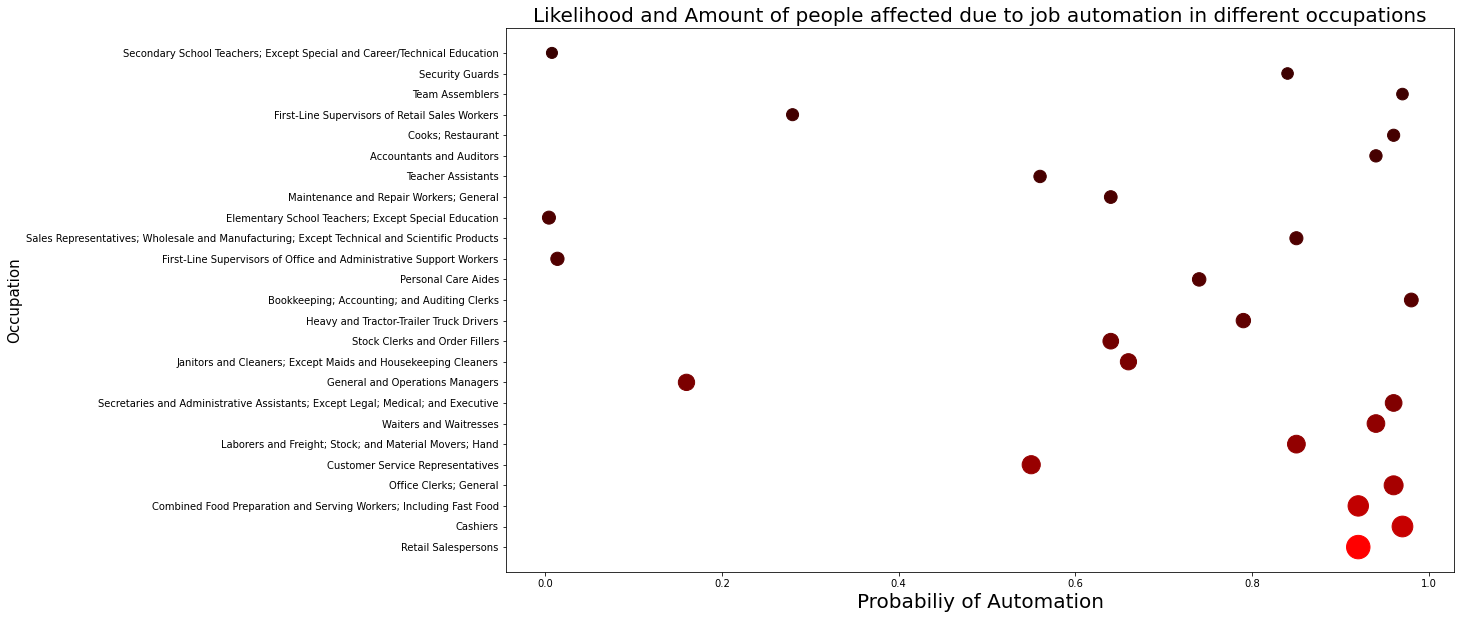

In [10]:
end_range = 25

x = occupation_sum_df['Probability'].values[:end_range]
y = np.arange(end_range)
y_label = occupation_sum_df['Occupation'].values[:end_range]

scaling = occupation_sum_df['Num of Workers'].values[:end_range]
max_num_of_workers = scaling.max()

scaling_norm = (scaling / max_num_of_workers) * 550

color1= [np.array([1,0,0]) * i for i in (scaling / max_num_of_workers)]


plt.figure(figsize=(17, 10))
plt.scatter(x,y, s=scaling_norm, c=color1)
plt.yticks(y,y_label)
plt.xlabel('Probabiliy of Automation', fontsize=20)
plt.ylabel('Occupation', fontsize=15)
plt.title('Likelihood and Amount of people affected due to job automation in different occupations', fontsize=20)
plt.show()

